In [3]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 9
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

In [4]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/positive_phase_duration/raw/ppd_all.csv"
filePath = os.path.join(working_dir, data_path)
shot_data = pd.read_csv(filePath)
shot_data.head()

,scaled_distance,positive_phase_duration,reference
0,2.036952,0.755295,"(Reisler et al., 1976, 1977)"
1,2.277968,0.965587,"(Reisler et al., 1976, 1977)"
2,2.509929,0.938515,"(Reisler et al., 1976, 1977)"
3,3.047117,0.886626,"(Reisler et al., 1976, 1977)"
4,3.522769,0.926388,"(Reisler et al., 1976, 1977)"


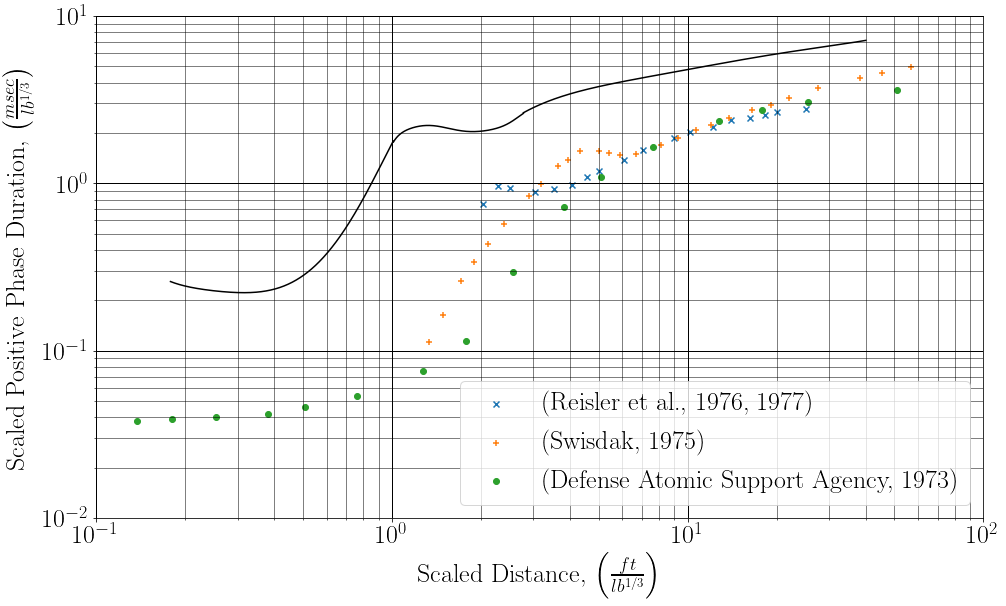

In [5]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)

else: #surface
    T1 = np.arange(0.178,1.01,0.001)
    TL1 = np.log10(T1)
    U1 = (1.92946154068 + 5.25099193925*TL1)   
    Y1 = 10**(- 0.61422760355900*U1**0 + 0.13014371767500*U1**1
              + 0.13487251195400*U1**2 + 0.03915742769060*U1**3
              - 0.00475933664702*U1**4 - 0.00428144598008*U1**5)
    
    T2 = np.arange(1.01,2.78,0.001)
    TL2 = np.log10(T2)
    U2 = (-2.12492525216 + 9.2996288611*TL2)   
    Y2 = 10**(0.31540924578400*U2**0 - 0.02979442689760*U2**1
            + 0.03063295428800*U2**2 + 0.01834055740860*U2**3
            - 0.01739646662110*U2**4 - 0.00106321963633*U2**5
            + 0.00562060030977*U2**6 + 0.00016182174990*U2**7
            - 0.00068601889440*U2**8)

    T3 = np.arange(2.78,40.00,0.001)
    TL3 = np.log10(T3)
    U3 = (-3.53626218091 + 3.46349745571*TL3)   
    Y3 = 10**(0.686906642409*U3**0 + 0.09330353040090*U3**1
         - 0.000584942088300*U3**2 - 0.00226884995010*U3**3
         - 0.002959085915050*U3**4 + 0.00148029868929*U3**5)

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'(Reisler et al., 1976, 1977)': 'x', '(Swisdak, 1975)': '+', '(Defense Atomic Support Agency, 1973)': 'o'}
for kind in mkr_dict:
    d = shot_data[shot_data.reference==kind]
    ax.scatter(d.scaled_distance, d.positive_phase_duration,  
                marker = mkr_dict[kind], label=kind)
ax.legend()
f = 1#0.81
plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.01,10)
plt.xlim(0.10,100)
plt.loglog(T1*f,Y1*f,color='black');
plt.loglog(T2*f,Y2*f,color='black');
plt.loglog(T3*f,Y3*f,color='black');
plt.ylabel(r'Scaled Positive Phase Duration, $\left(\frac{msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')
plt.tight_layout()
#ax.annotate('local max', xy=(3.2, 1.7), xytext=(4.1, 4.1),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

data_path = "5_reports/figures"
file_name = "fig_ppd_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

In [8]:
R = np.arange(0.2,40.0,0.01)
M = 1

#Sadovsky (need original paper)
t_p1 = 1.2*(M**(1/6))*R**(1/2)

#Henrych (need original paper)
R_p2 = np.arange(0.238,3.0,0.01)
t_p2 = (M**(1/3))*(0.107+0.444*R_p2+0.264*R_p2**(2)-0.129*R_p2**(3)+0.0335*R_p2**(4))

#Kinney and Graham
N = 980*(1+(R/0.54)**10)
D1 = 1+(R/0.02)**3
D2 = 1+(R/0.74)**6
D3 = (1+(R/6.9)**2)**(1/2)
t_p3 = (N/(D1*D2*D3))*M**(1/3)

#Swisdak
# Z =  0.2 - 1.02
f41 = 1
f42 = 1
z41 = np.arange(0.2,1.02,0.01)
A41 = 0.5426
B41 = 3.2299
C41 = -1.5931
D41 = -5.9667
E41 = -4.0815
F41 = -0.9149
t_p41 = f41*(M**(1/3))*np.exp(
         A41*(np.log(z41))**0 +
         B41*(np.log(z41))**1 +
         C41*(np.log(z41))**2 +
         D41*(np.log(z41))**3 +
         E41*(np.log(z41))**4 +
         F41*(np.log(z41))**5)
# Z =  1.02 - 2.80
z42 = np.arange(1.02,2.80,0.01)
A42 = 0.544
B42 = 2.7082
C42 = -9.7354
D42 = 14.3425
E42 = -9.7791
F42 = 2.835
t_p42 = f41*(M**(1/3))*np.exp(
         A42*(np.log(z42))**0 +
         B42*(np.log(z42))**1 +
         C42*(np.log(z42))**2 +
         D42*(np.log(z42))**3 +
         E42*(np.log(z42))**4 +
         F42*(np.log(z42))**5)
# Z =  2.80 - 40
z43 = np.arange(2.80,40,0.01)
A43 = -2.4608
B43 = 7.1639
C43 = -5.6215
D43 = 2.2711
E43 = -0.44994
F43 = 0.03486
t_p43 = f41*(M**(1/3))*np.exp(
         A43*(np.log(z43))**0 +
         B43*(np.log(z43))**1 +
         C43*(np.log(z43))**2 +
         D43*(np.log(z43))**3 +
         E43*(np.log(z43))**4 +
         F43*(np.log(z43))**5)

#Smith
t_p4 = (M**(1/3))*10**(0.25+0.27*np.log10(R/M**(1/3)))

#Wu and Hao
Z = R/(M)**(1/3)
t_rise = 1.9*Z**(1.3)
t_decr = (0.5*Z**(0.72))*M**(0.4)
t_p5 = t_rise + t_decr

#Iqbal and Ahmad (2009)
t_p6 = (4.6*(R/M**(1/3))**0.92) + (1.3*(R/M**(1/3))**0.89)*M**0.52

#Ahmad et al. (2012)
# Z =  2.1 - 3.41
z7 = np.arange(2.1,3.41,0.01)
t_p7 = 0.3108*(z7)**(-0.1) + 2.462*(z7)**(-0.472)

#Izadifard and Foroutan (2010)
#Z <= 0.37
R71 = np.arange(0.2,0.371,0.01)
t_p71 = (-(64.86*R71**4)+(52.32*R71**3)-(15.68*R71**2)+(1.794*R71**1)+(0.1034*R71**0))*M**(1/3)
#Z 0.37 - 0.82
R72 = np.arange(0.37,0.83,0.01)
t_p72 = ((4.64*R72**2)-(3.86*R72**1)+(0.854*R72**0))*M**(1/3)
#Z 0.82 - 2.5
R73 = np.arange(0.82,2.5,0.01)
X73 = np.log10(R73)
t_p73 = (-(2.97*X73**3)+(6.27*X73**2)+(0.358*X73**1)+(0.763*X73**0))*M**(1/3)
#Z 2.5 - infinity
R74 = np.arange(2.5,40,0.01)
X74 = np.log10(R74)
t_p74 = ((0.608*X74**3)-(2.38*X74**2)+(5.62*X74**1)-(0.22*X74**0))*M**(1/3)

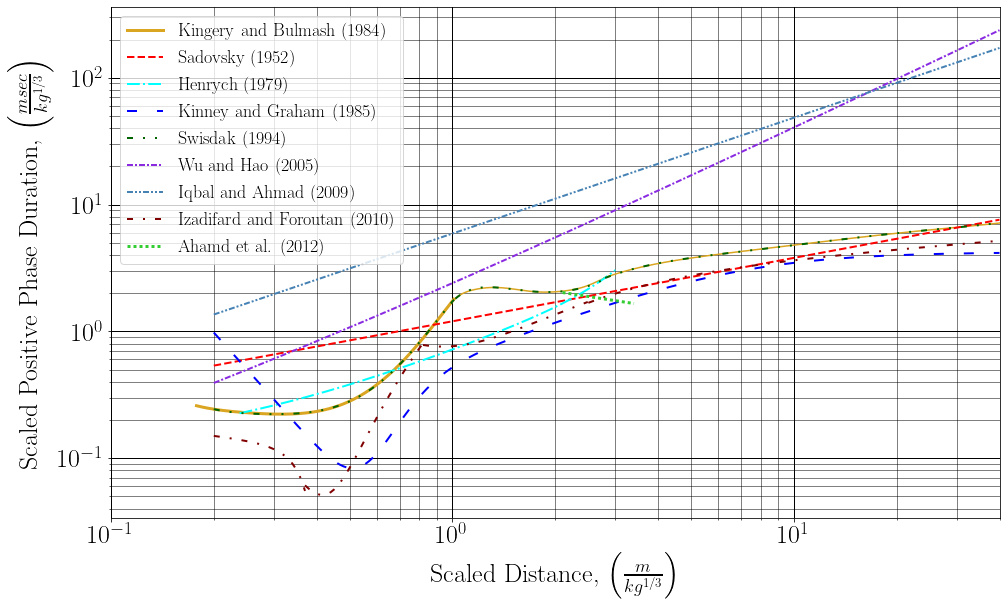

In [22]:
#pltfont = {'fontname':'serif', 'fontsize':'18'}
fig, ax = plt.subplots(figsize=(w, h))

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
#plt.ylim(0.01,100)
plt.xlim(0.1,40)
# Kingery and Bulmasn (1984) ##########
plt.loglog(T1,Y1,color='goldenrod',linewidth=3.0,label='Kingery and Bulmash (1984)');
plt.loglog(T2,Y2,color='goldenrod');
plt.loglog(T3,Y3,color='goldenrod');
# Sadovsky (1952) #####################
plt.loglog(R,t_p1,'r--',linewidth=2.0, label='Sadovsky (1952)');
# Henrych #############################
plt.loglog(R_p2,t_p2,color='cyan',linewidth=2.0, linestyle='-.', label='Henrych (1979)');
# Kinnery and Graham (1985) ###########
plt.loglog(R,t_p3,color='blue',linewidth=2.0, linestyle=(0, (5, 10)), label='Kinney and Graham (1985)');
# Swisdak #############################
plt.loglog(z41,t_p41,color='darkgreen',linewidth=2.0,linestyle=(0, (3, 5, 1, 5, 1, 5)), label='Swisdak (1994)');
plt.loglog(z42,t_p42,color='darkgreen',linewidth=2.0,linestyle=(0, (3, 5, 1, 5, 1, 5)));
plt.loglog(z43,t_p43,color='darkgreen',linewidth=2.0,linestyle=(0, (3, 5, 1, 5, 1, 5)));
# Smith (2004) ########################
#plt.loglog(R,t_p4,color='lightblue',linestyle=(0,(5,10)), label='Smith (2004)');
# Wu and Hao (2005) ###################
plt.loglog(R,t_p5,color='blueviolet',linewidth=2.0,linestyle=(0, (3,1,1,1)), label='Wu and Hao (2005)');
# Iqbal and Ahmad (2009) ##############
plt.loglog(R,t_p6,color='steelblue',linewidth=2.0,linestyle=(0, (3, 1, 1, 1, 1, 1)), label='Iqbal and Ahmad (2009)');
# Izadifard and Foroutan (2010)
plt.loglog(R71,t_p71,color='maroon',linewidth=2.0,linestyle=(0, (3, 5, 1, 5)), label='Izadifard and Foroutan (2010)');
plt.loglog(R72,t_p72,color='maroon',linewidth=2.0,linestyle=(0, (3, 5, 1, 5)));
plt.loglog(R73,t_p73,color='maroon',linewidth=2.0,linestyle=(0, (3, 5, 1, 5)));
plt.loglog(R74,t_p74,color='maroon',linewidth=2.0,linestyle=(0, (3, 5, 1, 5)));
# Ahmed et al. (2012)
plt.loglog(z7,t_p7,color='limegreen',linewidth=3.0,linestyle=(0, (1, 1)), label='Ahamd et al. (2012)');


plt.ylabel(r'Scaled Positive Phase Duration, $\left(\frac{msec}{kg^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{m}{kg^{1/3}}\right)$')
plt.tight_layout()
ax.legend(fontsize='x-small', loc=0)
data_path = "5_reports/figures"
file_name = "fig_ppd_all-others_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

$$Z = 1\frac{ft}{\sqrt[3]{lb}}\times\frac{0.3048m}{1ft}\times\frac{\sqrt[3]{lb}}{\sqrt[3]{0.453592kg}}=0.396698\frac{m}{\sqrt[3]{kg}}$$